In [8]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

In [9]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [10]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

# Normalize
X_train_full = X_train_full / 255.0
X_test = X_test / 255.0

# Add channel dimension for CNN
X_train_full = X_train_full[..., np.newaxis]
X_test = X_test[..., np.newaxis]

# Validation Split
X_valid, X_train = X_train_full[:5000], X_train_full[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

class_names = [
    "T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
    "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"
]

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [11]:
data_augmentation = keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1)
])

In [12]:
model = keras.models.Sequential([

    # Data Augmentation Layer
    data_augmentation,

    # Block 1
    layers.Conv2D(32, (3,3), padding="same", activation="relu", input_shape=(28,28,1)),
    layers.BatchNormalization(),
    layers.Conv2D(32, (3,3), padding="same", activation="relu"),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.25),

    # Block 2
    layers.Conv2D(64, (3,3), padding="same", activation="relu"),
    layers.BatchNormalization(),
    layers.Conv2D(64, (3,3), padding="same", activation="relu"),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.3),

    # Block 3
    layers.Conv2D(128, (3,3), padding="same", activation="relu"),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.4),

    # Classification Head
    layers.Flatten(),
    layers.Dense(256, activation="relu"),
    layers.BatchNormalization(),
    layers.Dropout(0.5),

    layers.Dense(10, activation="softmax")
])

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential (Sequential)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ ?                      │   0 (unbuilt) │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ ?                      │   0 (unbuilt) │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ ?                      │   0 (unbuilt) │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ ?                      │   0 (unbuilt) │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ ?                      │   0 (unbuilt) │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ ?                      │   0 (unbuilt) │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [13]:
optimizer = keras.optimizers.Adam(learning_rate=0.001)

model.compile(
    optimizer=optimizer,
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)


In [14]:
callbacks = [
    keras.callbacks.EarlyStopping(
        monitor="val_loss",
        patience=5,
        restore_best_weights=True
    ),
    keras.callbacks.ModelCheckpoint(
        "best_fashion_cnn.keras",
        save_best_only=True
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss",
        factor=0.5,
        patience=3,
        verbose=1
    )
]

In [15]:
history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=64,
    validation_data=(X_valid, y_valid),
    callbacks=callbacks
)


Epoch 1/50
860/860 ━━━━━━━━━━━━━━━━━━━━ 28s 18ms/step - accuracy: 0.6090 - loss: 1.1860 - val_accuracy: 0.8180 - val_loss: 0.4905 - learning_rate: 0.0010
Epoch 2/50
860/860 ━━━━━━━━━━━━━━━━━━━━ 15s 17ms/step - accuracy: 0.7848 - loss: 0.5936 - val_accuracy: 0.8546 - val_loss: 0.3989 - learning_rate: 0.0010
Epoch 3/50
860/860 ━━━━━━━━━━━━━━━━━━━━ 15s 18ms/step - accuracy: 0.8111 - loss: 0.5157 - val_accuracy: 0.8684 - val_loss: 0.3419 - learning_rate: 0.0010
Epoch 4/50
860/860 ━━━━━━━━━━━━━━━━━━━━ 16s 18ms/step - accuracy: 0.8296 - loss: 0.4651 - val_accuracy: 0.8812 - val_loss: 0.3310 - learning_rate: 0.0010
Epoch 5/50
860/860 ━━━━━━━━━━━━━━━━━━━━ 15s 17ms/step - accuracy: 0.8400 - loss: 0.4419 - val_accuracy: 0.8858 - val_loss: 0.3097 - learning_rate: 0.0010
Epoch 6/50
860/860 ━━━━━━━━━━━━━━━━━━━━ 21s 18ms/step - accuracy: 0.8492 - loss: 0.4114 - val_accuracy: 0.8976 - val_loss: 0.2893 - learning_rate: 0.0010
Epoch 7/50
860/860 ━━━━━━━━━━━━━━━━━━━━ 15s 17ms/step - accuracy: 0.8553 - l

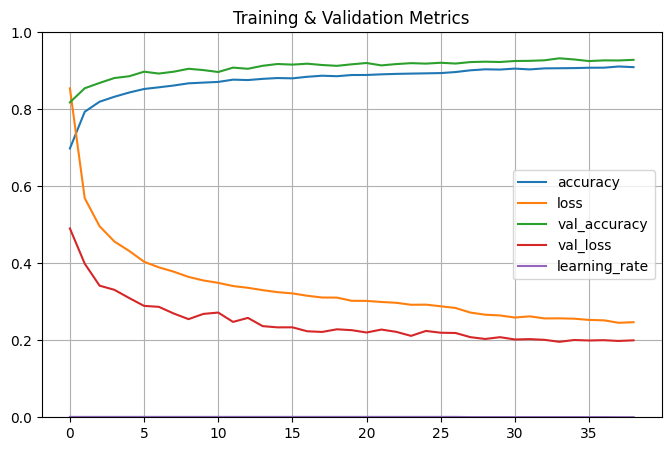

In [16]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.title("Training & Validation Metrics")
plt.show()


In [17]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print("\nTest Accuracy:", test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9189 - loss: 0.2277

Test Accuracy: 0.9200999736785889


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


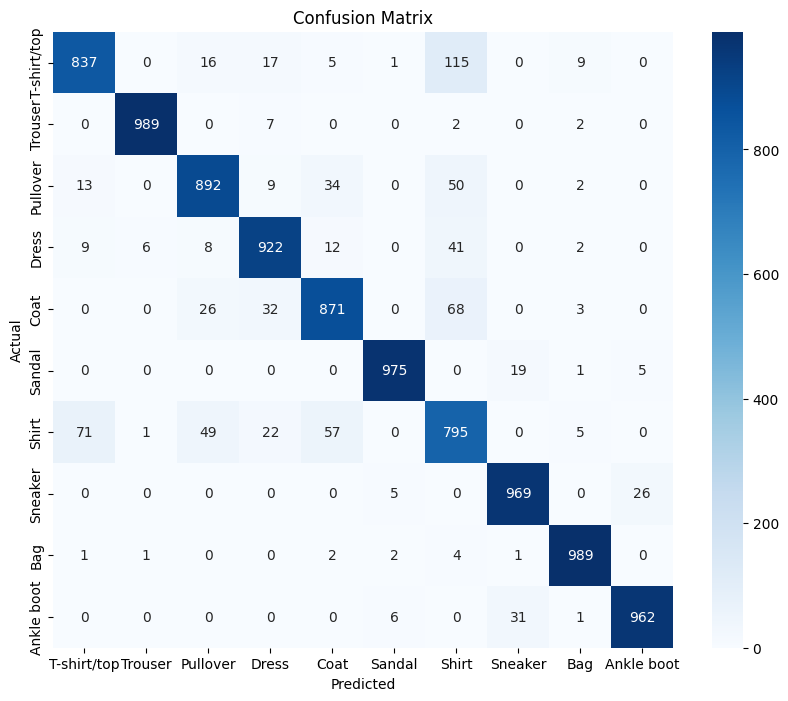

In [18]:
y_pred = np.argmax(model.predict(X_test), axis=1)

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=class_names,
            yticklabels=class_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()



In [19]:
print(classification_report(y_test, y_pred, target_names=class_names))

              precision    recall  f1-score   support

 T-shirt/top       0.90      0.84      0.87      1000
     Trouser       0.99      0.99      0.99      1000
    Pullover       0.90      0.89      0.90      1000
       Dress       0.91      0.92      0.92      1000
        Coat       0.89      0.87      0.88      1000
      Sandal       0.99      0.97      0.98      1000
       Shirt       0.74      0.80      0.77      1000
     Sneaker       0.95      0.97      0.96      1000
         Bag       0.98      0.99      0.98      1000
  Ankle boot       0.97      0.96      0.97      1000

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000



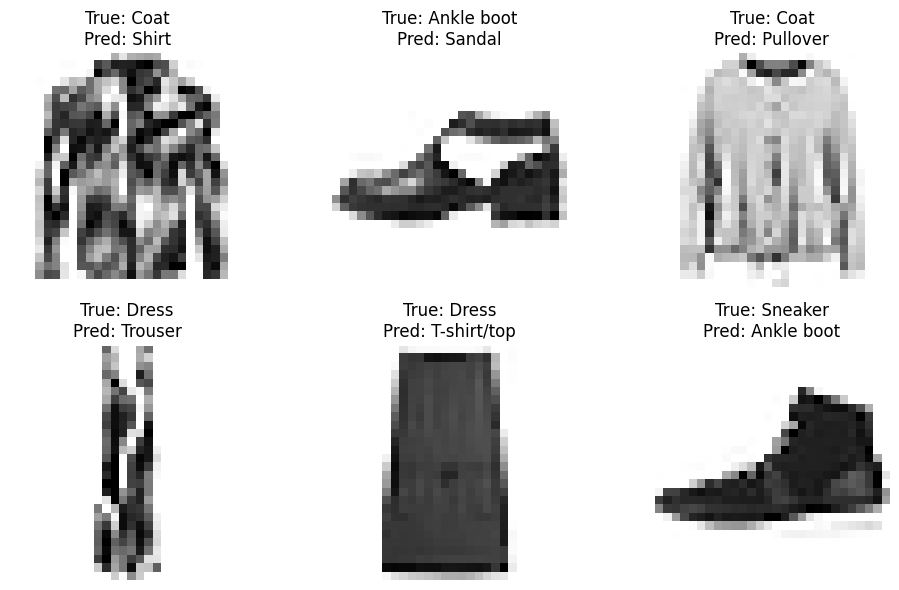

In [20]:
misclassified = np.where(y_test != y_pred)[0]

plt.figure(figsize=(10,6))
for i, index in enumerate(misclassified[:6]):
    plt.subplot(2,3,i+1)
    plt.imshow(X_test[index].squeeze(), cmap="binary")
    plt.title(f"True: {class_names[y_test[index]]}\nPred: {class_names[y_pred[index]]}")
    plt.axis("off")
plt.tight_layout()
plt.show()


In [21]:
model.save("fashion_classifier_production.keras")

print("Model saved successfully!")

Model saved successfully!
